In [2]:
import os
os.chdir("C:\\Users\\Chandana\\Documents\\Assignments\\mini Capstone")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as skm
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, roc_auc_score, confusion_matrix

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [5]:
data=pd.read_csv("bank.csv",header=0,sep=",")

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data.shape

(41188, 20)

In [8]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.3+ MB


In [10]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [12]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
data=data.rename(columns= {"emp.var.rate":"emp_var_rate",
                             "cons.price.idx": "cons_price_idx",
                             "cons.conf.idx": "cons_conf_idx",
                             "nr.employed": "nr_employed"})

In [14]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [15]:
duplicate_rows = data[data.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicate_rows)

Duplicate Rows except first occurrence based on all columns are :
       age            job   marital            education  default housing  \
10      41    blue-collar   married              unknown  unknown      no   
11      25       services    single          high.school       no     yes   
16      35    blue-collar   married             basic.6y       no     yes   
31      59     technician   married              unknown       no     yes   
104     52         admin.  divorced    university.degree       no      no   
220     35         admin.   married          high.school       no     yes   
226     42     technician   married    university.degree       no      no   
260     33         admin.   married          high.school       no      no   
276     34       services   married          high.school       no      no   
277     55    blue-collar   married             basic.4y  unknown      no   
331     36    blue-collar   married             basic.9y       no     yes   
338     55

Text(0.5, 1.0, 'Heatmap for highest correlated features in Bank Marketing data')

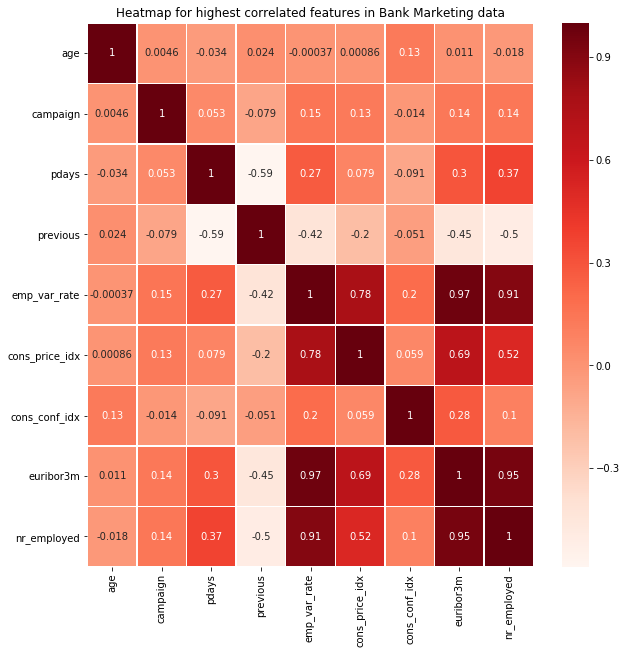

In [16]:

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(), cmap="Reds",annot=True, linewidths=.5)
plt.title("Heatmap for highest correlated features in Bank Marketing data")

In [17]:
data['previous'].count()

41188

#### Check Missing Data
One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.

In the function below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.
The function ideally returns a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [18]:
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(data)
print(missing_data)

                Total  Percent
y                   0      0.0
nr_employed         0      0.0
job                 0      0.0
marital             0      0.0
education           0      0.0
default             0      0.0
housing             0      0.0
loan                0      0.0
contact             0      0.0
month               0      0.0
day_of_week         0      0.0
campaign            0      0.0
pdays               0      0.0
previous            0      0.0
poutcome            0      0.0
emp_var_rate        0      0.0
cons_price_idx      0      0.0
cons_conf_idx       0      0.0
euribor3m           0      0.0
age                 0      0.0


In [19]:
# Function to drop missing values
def drop_missing(dataset, missing,value):
    dataset = dataset.drop((missing[missing['Percent'] > value]).index,axis= 1)
    print(dataset.isnull().sum().sort_values(ascending = False))
    return dataset 
    
data = drop_missing(data,missing_data,0.60)

y                 0
nr_employed       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
age               0
dtype: int64


#### Check for Class Imbalance¶
Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of 80:20 or greater is typically considered as an imbalance for a binary classification.

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance.

Let's write a function below that takes the target variable and outputs the distribution of classes in the target.

In [20]:

def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(data['y'])

no     88.734583
yes    11.265417
Name: y, dtype: float64

##### Observations :
The class distribution in the target is ~89:11. This is a clear indication of imbalance.
using Resampling techniques , we will do model selection.

### Detect outliers in the continuous columns
Outliers are observations that lie far away from majority of observations in the dataset and can be represented mathematically in different ways.

One method of defining outliers are: outliers are data points lying beyond (third quartile + 1.5xIQR) and below (first quartile - 1.5xIQR).

The function below takes a dataframe and outputs the number of outliers in every numeric feature based on the above rule of IQR


In [21]:
# Function to detect outliers in every feature
def detect_outliers(data):
    cols = list(data)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in data.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = data[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = data[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':data.loc[(data[column] < fence_low) | (data[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)

,Feature,Number of Outliers
0,age,469
1,campaign,2406
2,pdays,1515
3,previous,5625
4,emp_var_rate,0
5,cons_price_idx,0
6,cons_conf_idx,447
7,euribor3m,0
8,nr_employed,0


##### Observations :
As per the IQR methodology, there are outliers in majority of the columns.
In the further steps below, we will see how to deal with the outliers.

### Data Visualizations:Boxplot

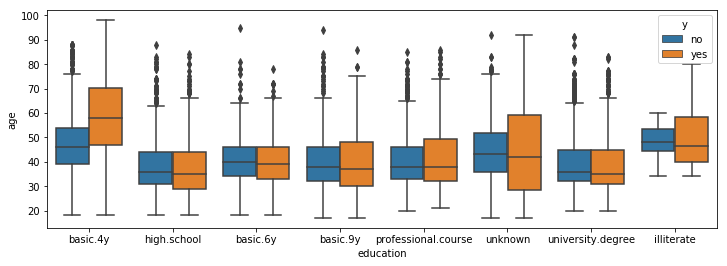

In [22]:
plt.figure(figsize=(12,4))
sns.boxplot(x='education', y='age', data=data, hue='y')
plt.show()

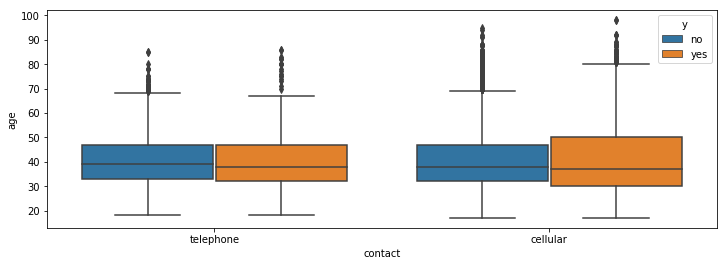

In [23]:
plt.figure(figsize=(12,4))
sns.boxplot(x='contact', y='age', data=data, hue='y')
plt.show()

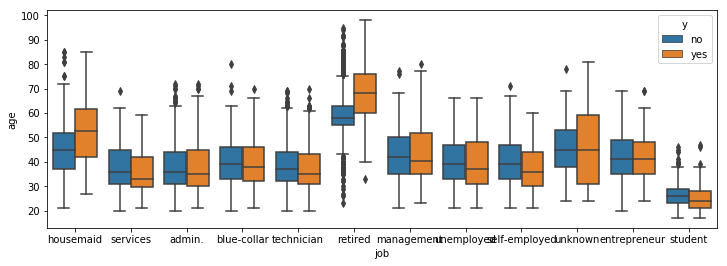

In [24]:

plt.figure(figsize=(12,4))
sns.boxplot(x='job', y='age', data=data, hue='y')
plt.show()

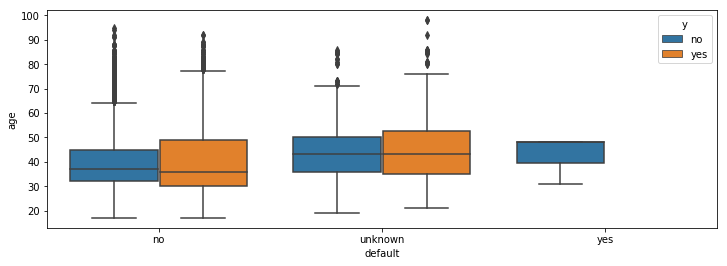

In [25]:
plt.figure(figsize=(12,4))
sns.boxplot(x='default', y='age', data=data, hue='y')
plt.show()

In [26]:
print('Number of yes:',sum(data.previous==0))
print('Percentage',sum(data.previous==0)/data.previous.count())

Number of yes: 35563
Percentage 0.8634310964358551


###  Data Visualizations

y - has the client subscribed a term deposit?

In [27]:
print('Number of yes:',sum(data.y=='yes'))
print('Percentage',sum(data.y=='yes')/data.y.count())

Number of yes: 4640
Percentage 0.11265417111780131


['no' 'yes']


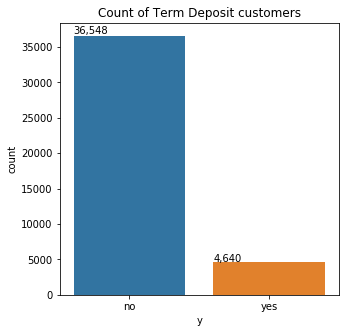

In [28]:
print(data['y'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['y'])
ax.set_title("Count of Term Deposit customers")
for p in ax.patches:
       ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

In [29]:
data['age'].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64)

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]


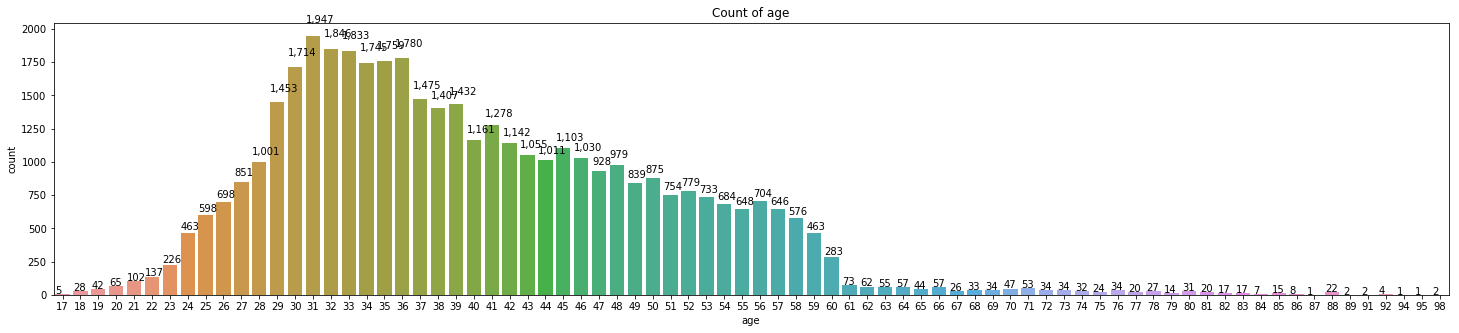

In [30]:
print(data['age'].unique())

fig = plt.figure(figsize=(25,5))
ax = sns.countplot(data['age'])
ax.set_title("Count of age")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.05))
plt.show()

In [31]:
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


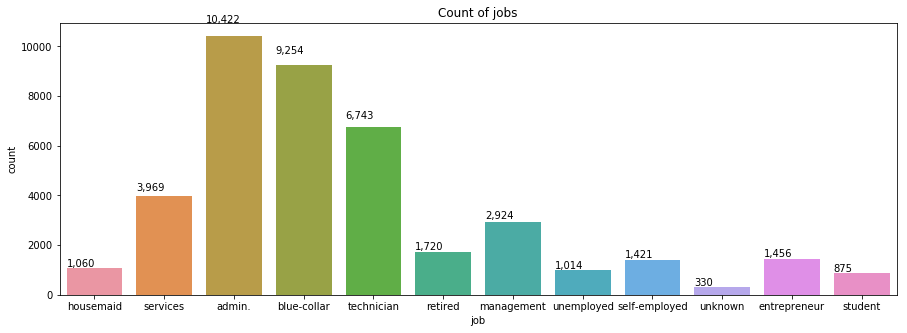

In [32]:
print(data['job'].unique())

fig = plt.figure(figsize=(15,5))
ax = sns.countplot(data['job'])
ax.set_title("Count of jobs")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.05))
plt.show()

In [33]:
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

['married' 'single' 'divorced' 'unknown']


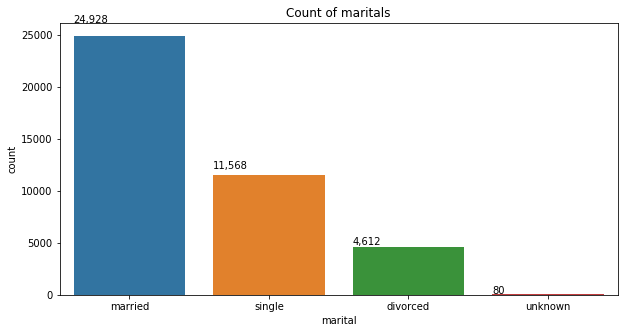

In [34]:
print(data['marital'].unique())

fig = plt.figure(figsize=(10,5))
ax = sns.countplot(data['marital'])
ax.set_title("Count of maritals")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.05))
plt.show()

In [36]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


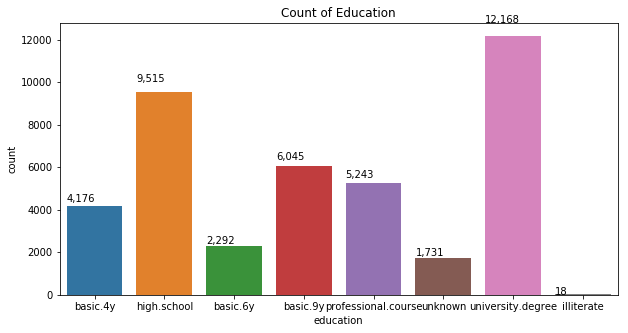

In [37]:
print(data['education'].unique())

fig = plt.figure(figsize=(10,5))
ax = sns.countplot(data['education'])
ax.set_title("Count of Education")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.05))
plt.show()

In [38]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [39]:
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

['no' 'unknown' 'yes']


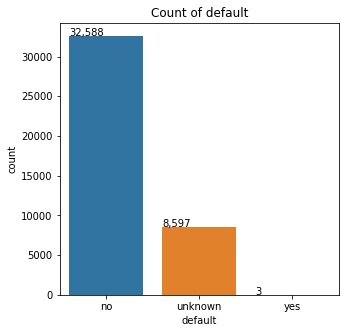

In [40]:
print(data['default'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['default'])
ax.set_title("Count of default")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.0))
plt.show()

In [41]:
data['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

['no' 'yes' 'unknown']


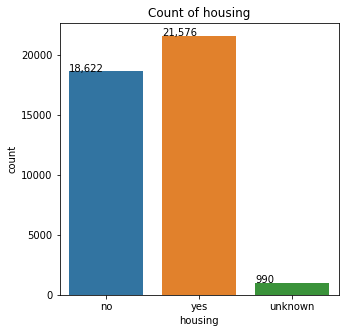

In [42]:
print(data['housing'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['housing'])
ax.set_title("Count of housing")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.0))
plt.show()

In [43]:
data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

['no' 'yes' 'unknown']


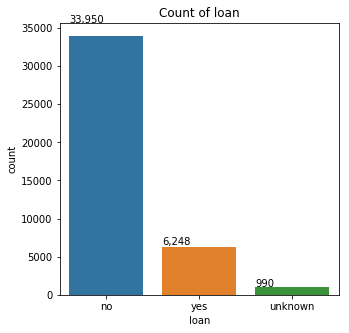

In [44]:
print(data['loan'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['loan'])
ax.set_title("Count of loan")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.05))
plt.show()

In [45]:
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

['telephone' 'cellular']


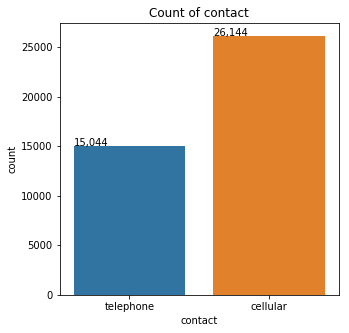

In [46]:
print(data['contact'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['contact'])
ax.set_title("Count of contact")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1))
plt.show()

In [47]:
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']


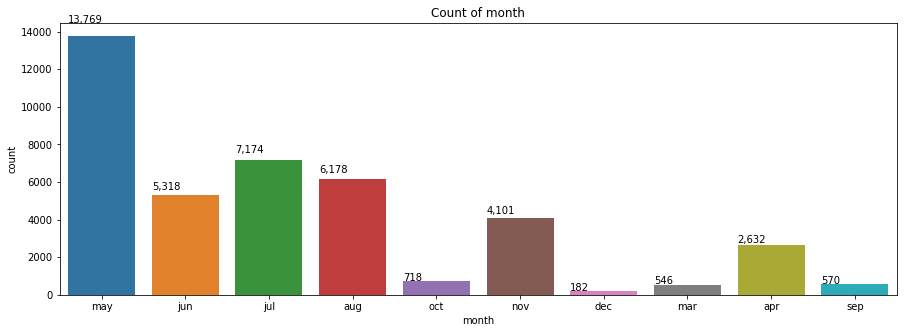

In [48]:
print(data['month'].unique())

fig = plt.figure(figsize=(15,5))
ax = sns.countplot(data['month'])
ax.set_title("Count of month")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.05))
plt.show()

In [49]:
data['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

['mon' 'tue' 'wed' 'thu' 'fri']


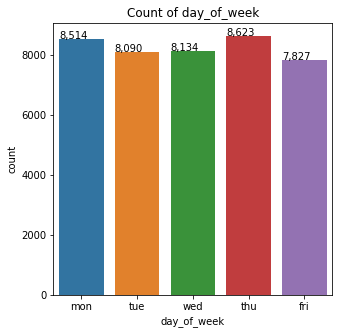

In [50]:
print(data['day_of_week'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['day_of_week'])
ax.set_title("Count of day_of_week")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.0))
plt.show()

In [51]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

['nonexistent' 'failure' 'success']


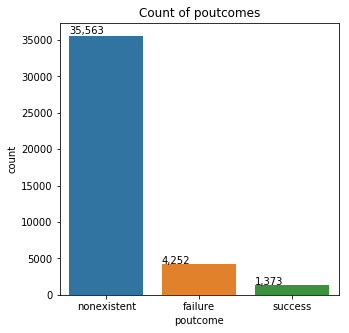

In [52]:
print(data['poutcome'].unique())

fig = plt.figure(figsize=(5,5))
ax = sns.countplot(data['poutcome'])
ax.set_title("Count of poutcomes")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

##### Data Visualization - count plots

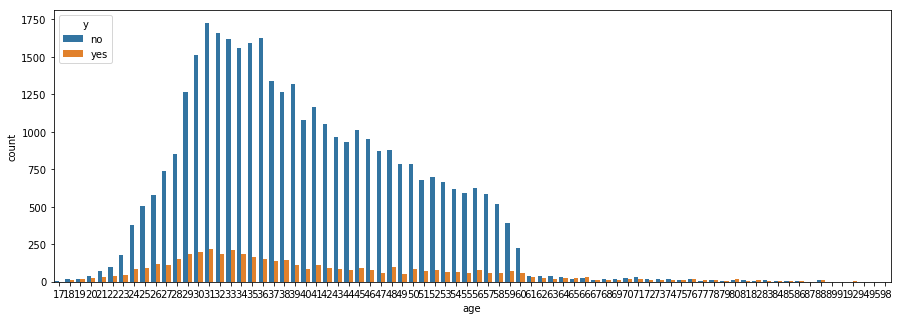

In [53]:
plt.figure(figsize=(15,5))
sns.countplot(data['age'],hue=data['y'])
plt.show()


In [54]:
print('Number of yes:',sum(data.y=='yes'))
print('Percentage',sum(data.y=='yes')/data.y.count())

Number of yes: 4640
Percentage 0.11265417111780131


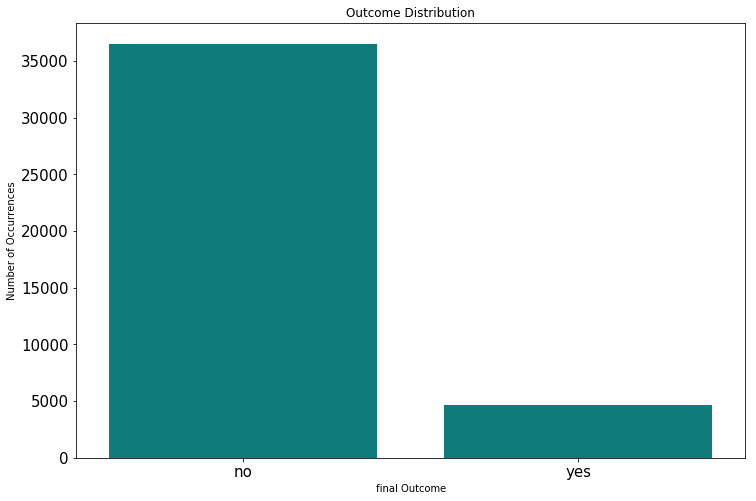

In [55]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'y', data = data, color = 'darkcyan')
ax.set_xlabel('final Outcome')
ax.set_ylabel('Number of Occurrences')
ax.set_title('Outcome Distribution')
ax.tick_params(labelsize=15)

It is clear that the outcome in the dataset is highly imbalanced.
For imbalanced data sets, accuracy alone won't cut is as the metric to measure the model. 
This is a case where we need to avoid false positives as we want to be sure about people who can invest in term deposits with the bank. 
Since our goal is to reduce the False Positives, precision is a good metric to track.

In [56]:
#AGE

print('Min age: ', data['age'].max())
print('Max age: ', data['age'].min())
print('Null Values: ', data['age'].isnull().any())

Min age:  98
Max age:  17
Null Values:  False


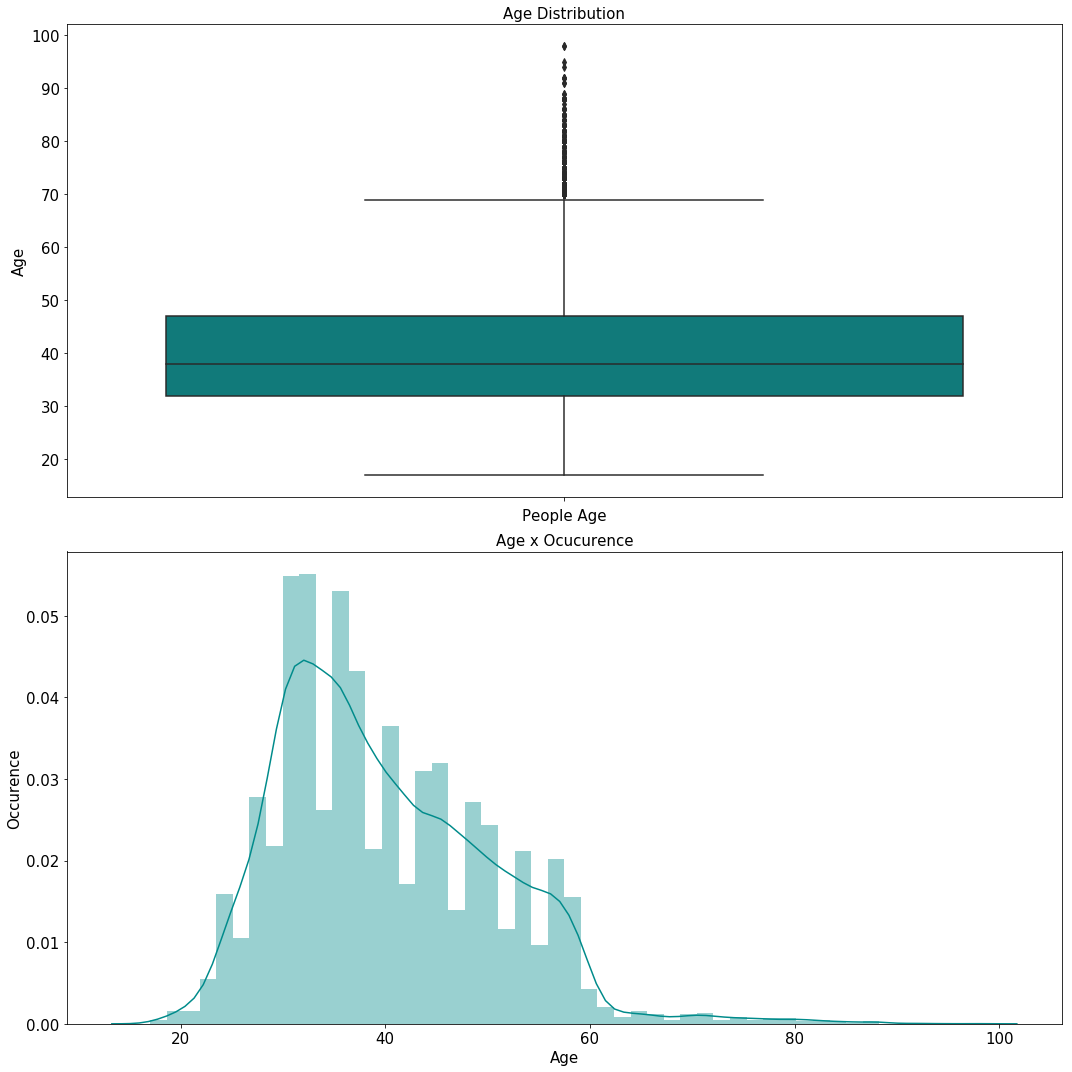

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 15))
sns.boxplot(x = 'age', data = data, orient = 'v', ax = ax1, color = 'darkcyan')
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)

sns.distplot(data['age'], ax = ax2, color = 'darkcyan')
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


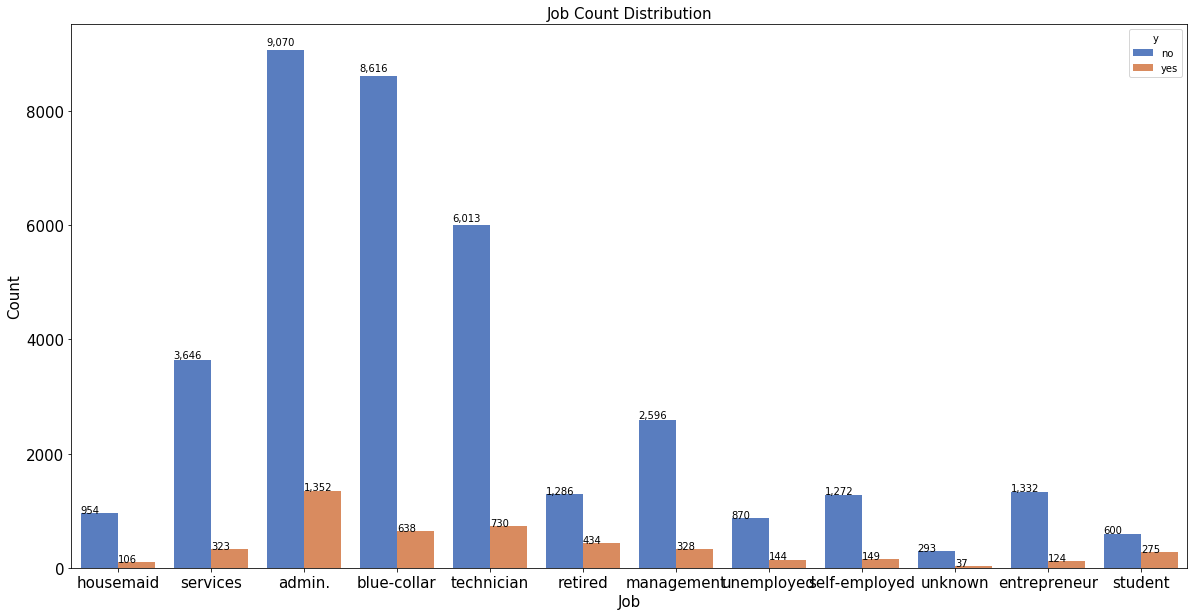

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'job',hue = 'y', data = data, palette="muted")
ax.set_xlabel('Job', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Job Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

In [59]:
data.groupby(['job', 'y'])['y'].count()

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

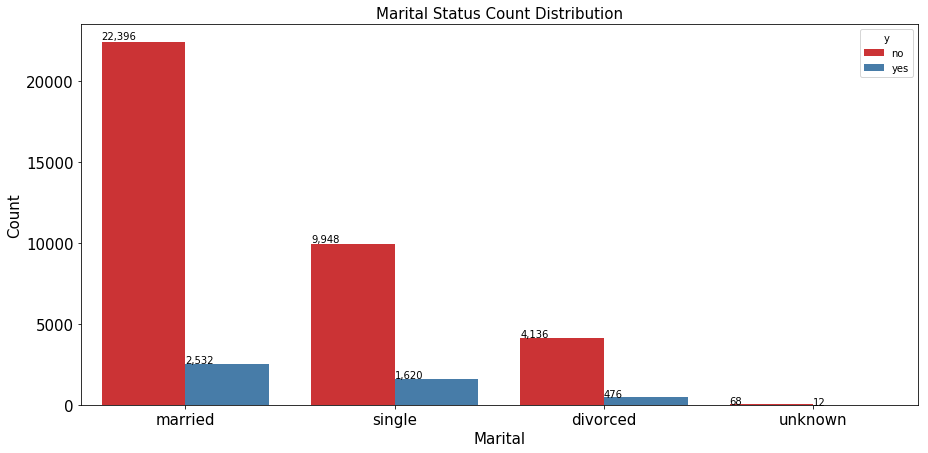

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)
sns.countplot(x = 'marital', hue='y', data = data, palette="Set1")
ax.set_xlabel('Marital', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Marital Status Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

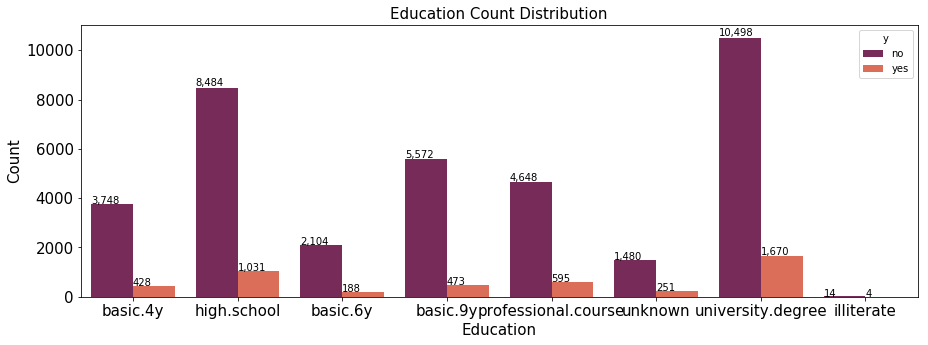

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
sns.countplot(x = 'education', hue='y', data = data,palette="rocket")
ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))
plt.show()

In [62]:
data.education=data.education.replace(['illiterate','basic.4y','basic.6y', 'basic.9y', 'high.school', 
                                                    'university.degree','professional.course', 'unknown'],[0,1,2,3,4,5,6,5])

print('Changed : ',data.education.unique())

Changed :  [1 4 2 3 6 5 0]


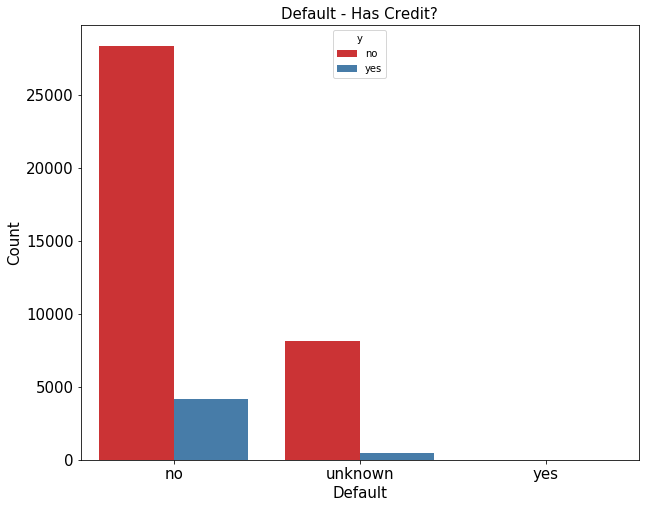

In [63]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'default',hue='y', data = data, order = ['no', 'unknown', 'yes'], palette="Set1")
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Default - Has Credit?', fontsize=15)
ax.tick_params(labelsize=15)


In [64]:
data[data.default == 'no'][['y','default']].groupby('y').count()

,default
y,
no,28391
yes,4197


In [65]:
data[data.default == 'yes'][['y','default']].groupby('y').count()

,default
y,
no,3


In [66]:
data[data.default == 'unknown'][['y','default']].groupby('y').count()

,default
y,
no,8154
yes,443


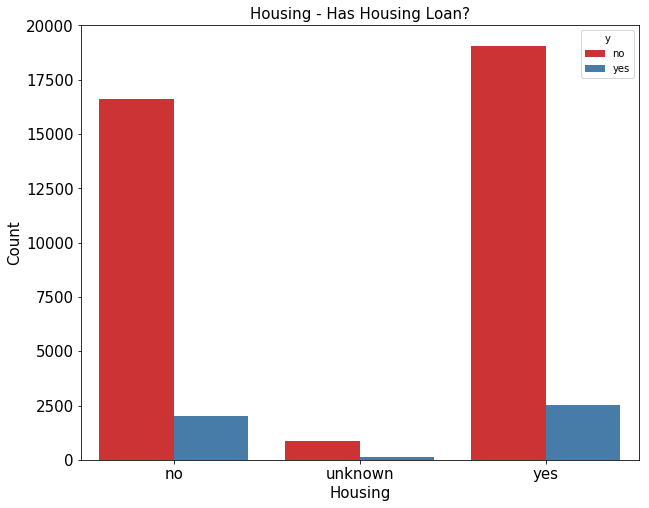

In [67]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.countplot(x = 'housing',hue='y', data = data, order = ['no', 'unknown', 'yes'], palette="Set1")
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Housing - Has Housing Loan?', fontsize=15)
ax.tick_params(labelsize=15)


In [68]:
print('Original : ',data.housing.unique())
print('Percentage of Unknown',sum(data.housing=='unknown')/data.education.count())
data[['y','housing']].groupby('housing').count()

Original :  ['no' 'yes' 'unknown']
Percentage of Unknown 0.0240361270272895


,y
housing,
no,18622
unknown,990
yes,21576


In [69]:
data.housing = data.housing.replace(['unknown'],['yes'])

data[['y','housing']].groupby('housing').count()

,y
housing,
no,18622
yes,22566


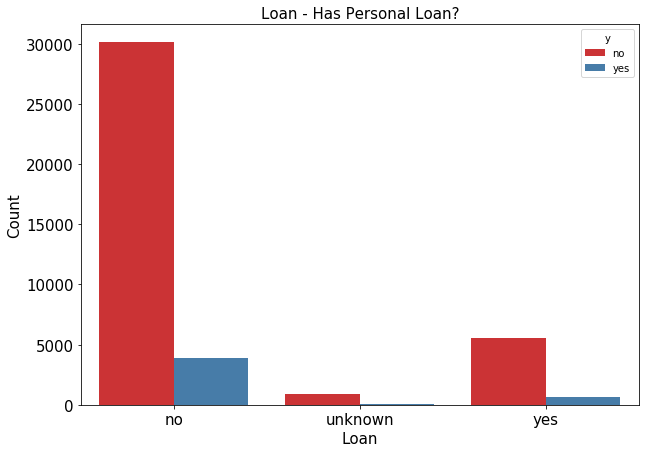

In [70]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 7)
sns.countplot(x = 'loan',hue='y', data = data, order = ['no', 'unknown', 'yes'], palette="Set1")
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Loan - Has Personal Loan?', fontsize=15)
ax.tick_params(labelsize=15)

In [71]:
print('Original : ',data.loan.unique())
print('Percentage of Unknown',sum(data.loan=='unknown')/data.loan.count())
data[['y','loan']].groupby('loan').count()

Original :  ['no' 'yes' 'unknown']
Percentage of Unknown 0.0240361270272895


,y
loan,
no,33950
unknown,990
yes,6248


In [72]:
print('Number of 999 (Not contacted before) in pdays:',sum(data.pdays==999))
print('Percentage',sum(data.pdays==999)/data.pdays.count())

Number of 999 (Not contacted before) in pdays: 39673
Percentage 0.9632174419733903


In [73]:
data.groupby('pdays')['pdays'].count()

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64

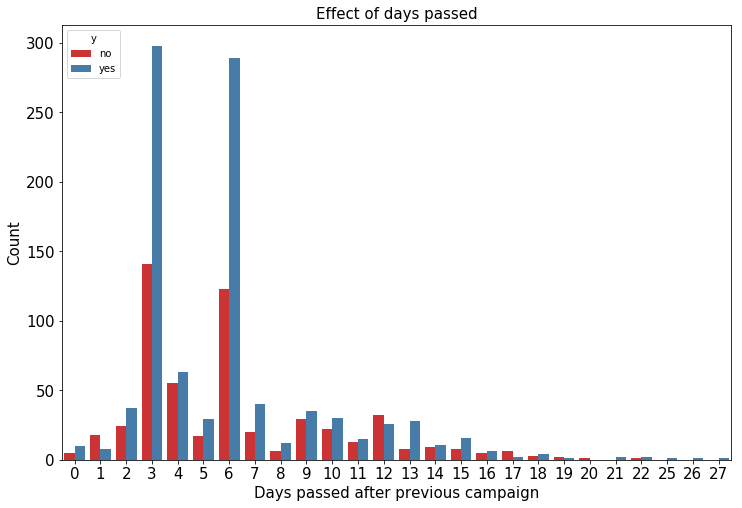

In [74]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.countplot(x = 'pdays', hue='y', data = data[data.pdays != 999], palette="Set1")
ax.set_xlabel('Days passed after previous campaign', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Effect of days passed', fontsize=15)
ax.tick_params(labelsize=15)

In [75]:
data['previous'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [76]:
# Function to treat outliers 
from scipy.stats.mstats import winsorize
def treat_outliers(data):
    cols = list(data)
    for col in cols:
        if col in data.select_dtypes(include=np.number).columns:
            data[col] = winsorize(data[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return data    


data = treat_outliers(data)

# Checking for outliers after applying winsorization
detect_outliers(data)

,Feature,Number of Outliers
0,age,0
1,education,0
2,campaign,0
3,pdays,0
4,previous,5625
5,emp_var_rate,0
6,cons_price_idx,0
7,cons_conf_idx,0
8,euribor3m,0
9,nr_employed,0


In [77]:
data.y = data.y.replace(['yes','no'],[1,0])

#### One Hot Encoding or Mapping the Categorical Variables

In [78]:
data=data.drop(['euribor3m','nr_employed'],axis=1)

In [79]:
data = pd.get_dummies(data,columns=['default','job','marital','housing','loan','contact','month','day_of_week','poutcome'],
                                                
                               prefix=['def','job','marry','house','loan','ph','month','wkday','pout'])

In [80]:
data.shape

(41188, 53)

In [81]:
data.head()

,age,education,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,y,def_no,...,month_oct,month_sep,wkday_fri,wkday_mon,wkday_thu,wkday_tue,wkday_wed,pout_failure,pout_nonexistent,pout_success
0,55,1,1,999,0,1.1,93.994,-36.4,0,1,...,0,0,0,1,0,0,0,0,1,0
1,55,4,1,999,0,1.1,93.994,-36.4,0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,4,1,999,0,1.1,93.994,-36.4,0,1,...,0,0,0,1,0,0,0,0,1,0
3,40,2,1,999,0,1.1,93.994,-36.4,0,1,...,0,0,0,1,0,0,0,0,1,0
4,55,4,1,999,0,1.1,93.994,-36.4,0,1,...,0,0,0,1,0,0,0,0,1,0


In [82]:
data.dtypes

age                    int64
education              int64
campaign               int64
pdays                  int64
previous               int64
emp_var_rate         float64
cons_price_idx       float64
cons_conf_idx        float64
y                      int64
def_no                 uint8
def_unknown            uint8
def_yes                uint8
job_admin.             uint8
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marry_divorced         uint8
marry_married          uint8
marry_single           uint8
marry_unknown          uint8
house_no               uint8
house_yes              uint8
loan_no                uint8
loan_unknown           uint8
loan_yes               uint8
ph_cellular            uint8
ph_telephone  

### Preprocessing For Model Fitting:


#### Separating the data into Features and Labels

In [83]:

X=(data.drop(['y'],axis=1))
y=data['y']

##### Splitting the data into train,test sets

In [84]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=2)

###### Printing the shape of the train and test data

In [85]:
# Shape of the Training and Test data

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (32950, 52) (32950,)
Test set: (8238, 52) (8238,)


###### Resampling Techniques :

In [86]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

#### Oversampling Minority Class :
Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

Important Note :
Always split into test and train sets BEFORE trying any resampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets! This can allow our model to simply memorize specific data points and cause overfitting.

In [87]:

from sklearn.utils import resample

In [88]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,age,education,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,def_no,def_unknown,...,month_sep,wkday_fri,wkday_mon,wkday_thu,wkday_tue,wkday_wed,pout_failure,pout_nonexistent,pout_success,y
9917,36,5,5,999,0,1.4,94.465,-41.8,1,0,...,0,0,0,0,0,1,0,1,0,0
23224,47,5,2,999,0,1.4,93.444,-36.1,1,0,...,0,0,0,0,1,0,0,1,0,0
24883,32,5,1,999,0,-0.1,93.200,-42.0,0,1,...,0,0,0,0,1,0,0,1,0,0
27029,47,5,1,999,0,-0.1,93.200,-42.0,1,0,...,0,1,0,0,0,0,0,1,0,0
9709,47,4,3,999,0,1.4,94.465,-41.8,0,1,...,0,0,1,0,0,0,0,1,0,0


In [89]:
X.shape

(32950, 53)

In [90]:

X[X.y==0].shape

(29230, 53)

In [91]:
# separate minority and majority classes
class_majority = X[X.y==0]
class_minority = X[X.y==1]

# upsample minority
minority_upsampled = resample(class_minority,
                          replace=True, # sample with replacement
                          n_samples=len(class_majority), # match number in majority class
                          random_state=20) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([class_majority, minority_upsampled])

# check new class counts
upsampled.y.value_counts()

1    29230
0    29230
Name: y, dtype: int64

In [92]:
# Training data
X_train = upsampled.drop('y', axis=1)
y_train = upsampled['y']

## Building KNN Model

### Hyperparameter tuning to find best k value using elbow method

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
neighbors = list(range(1,31, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

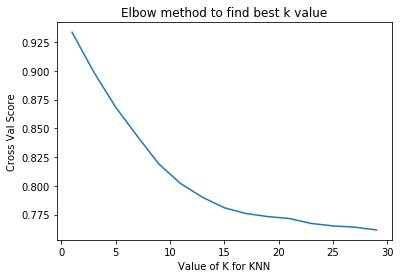

In [94]:
# Plotting the elbow method graph

plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Val Score')
plt.title("Elbow method to find best k value")
plt.show()

From the plot,we can see that the best k value is 15.

### Standardizing the data

In [95]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

#### Building KNN model with best k value:15

In [96]:
KNN = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
KNN.fit(X_train_std, y_train)#fitting the model
y_train_pred=KNN.predict(X_train_std)
y_test_pred=KNN.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.8190215531987683
The Test Accuracy is : 0.7005341102209274


#### Plotting ROC Curvres

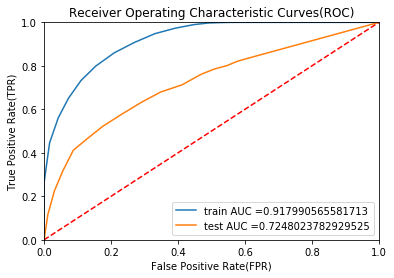

In [97]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  KNN.predict_proba(X_train_std)[:,1]
y_test_pred_proba=KNN.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

#### Plotting Confusion Matrix

In [98]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

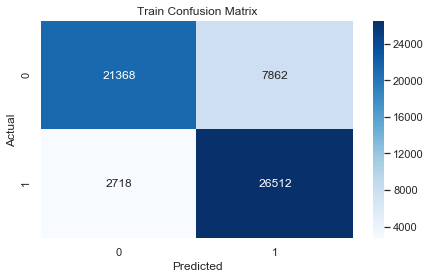

In [99]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()


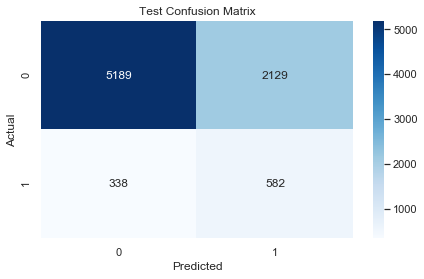

In [100]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

Since the dataset is imbalanced,we will use other metrics instead of accuracy.

#### Calculating f1 score :

In [101]:
f1_score_train=f1_score(y_train,y_train_pred)
f1_score_test=f1_score(y_test,y_test_pred)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)


Training F1_score is : 0.833658260486762
Testing F1_score is : 0.3205728449462958


#### Classification Report

In [102]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.89      0.73      0.80     29230
           1       0.77      0.91      0.83     29230

    accuracy                           0.82     58460
   macro avg       0.83      0.82      0.82     58460
weighted avg       0.83      0.82      0.82     58460

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.94      0.71      0.81      7318
           1       0.21      0.63      0.32       920

    accuracy                           0.70      8238
   macro avg       0.58      0.67      0.56      8238
weighted avg       0.86      0.70      0.75      8238



#### Saving KNN model for future purpose :

In [103]:

from sklearn.externals import joblib
joblib.dump(KNN,'KNN.pkl',compress=3)

['KNN.pkl']

# Building Logistic Regression

#### Hyperparameter tuning using Randomizedseachcv :

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1',random_state=2,n_jobs=-1,solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Random_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=10,random_state=3,n_jobs=-1)
Log_Randomecv=Random_cv.fit(X_train_std,y_train)

#### Finding best parameters

In [105]:
Log_Randomecv.best_params_

{'C': 0.1}

In [106]:
Log_Randomecv.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=2,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [107]:
Log_Randomecv.best_score_

0.7411734519329457

### Building Logistic Regression with best C valued using L1 regularization

In [108]:
log=LogisticRegression(C=10,penalty='l1',random_state=2,n_jobs=-1,solver='liblinear')
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred=log.predict(X_train_std)
y_test_pred=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.7414471433458775
The Test Accuracy is : 0.8336974993930566


#### Plotting ROC Curves :

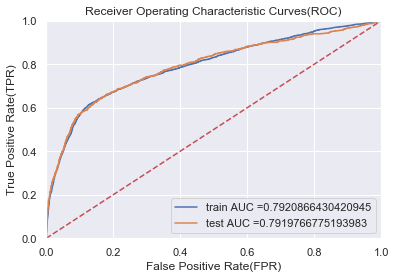

In [109]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

#### Plotting Confusion Matrices 

In [110]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix for L1 regularization :

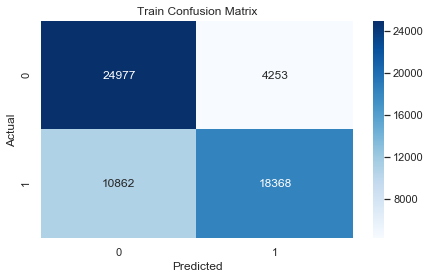

In [111]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix for L1 regularization

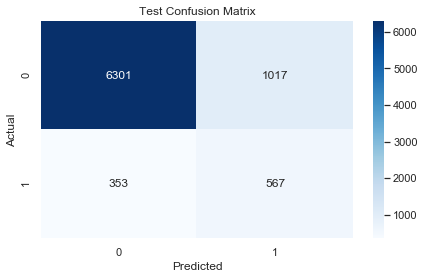

In [112]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Building Logistic Regression using L2 regularization
 

#### Hyperparameter tuning using Randomizedseachcv

In [113]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l2',random_state=5,n_jobs=-1)
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Random_cv_l2=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',
                                cv=10,random_state=5,n_jobs=-1)
Log_Randomecv_l2=Random_cv.fit(X_train_std,y_train)

#### Finding best parameters :

In [114]:
Log_Randomecv_l2.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=2,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

### Building Logistic Regression with best C valued using L2 regularization :


In [115]:
log=LogisticRegression(C=10,penalty='l2',random_state=5,n_jobs=-1)
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred_l2=log.predict(X_train_std)
y_test_pred_l2=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.7414471433458775
The Test Accuracy is : 0.8336974993930566


#### Plotting ROC Curves :

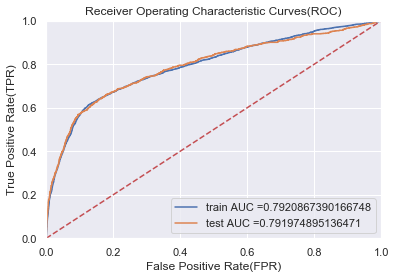

In [116]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

#### Plotting Confusion Matrices :

In [117]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_l2)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_l2)
df_Train_l2=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test_l2=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix for L2 regularization :

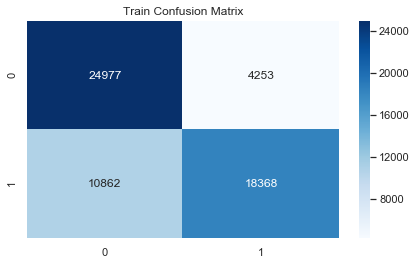

In [118]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train_l2, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix for L2 regularization :

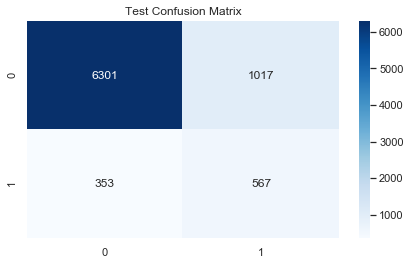

In [119]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test_l2, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Classification report- L1 regularization

In [120]:

from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.70      0.85      0.77     29230
           1       0.81      0.63      0.71     29230

    accuracy                           0.74     58460
   macro avg       0.75      0.74      0.74     58460
weighted avg       0.75      0.74      0.74     58460

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7318
           1       0.36      0.62      0.45       920

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.68      8238
weighted avg       0.88      0.83      0.85      8238



#### Classification report- L2 regularization

In [121]:

from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_l2)
Classificationreport_test=classification_report(y_test,y_test_pred_l2)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.70      0.85      0.77     29230
           1       0.81      0.63      0.71     29230

    accuracy                           0.74     58460
   macro avg       0.75      0.74      0.74     58460
weighted avg       0.75      0.74      0.74     58460

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.95      0.86      0.90      7318
           1       0.36      0.62      0.45       920

    accuracy                           0.83      8238
   macro avg       0.65      0.74      0.68      8238
weighted avg       0.88      0.83      0.85      8238



#### Saving Logistic Regression model for future purpose :

In [122]:
joblib.dump(log,'Logistic_Regression.pkl')

['Logistic_Regression.pkl']

## Building the model using Decision Tree


#### Hyperparameter tuning using Randomizedcv :

In [123]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[5, 10, 50, 100, 500]
min_samples_split=[5,10,20,30,40,50]
criterion=["gini", "entropy"]
params_grid=dict(max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)


In [ ]:
# Estimator

In [124]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=4)

In [125]:
# Building RandomizedsSearchCV

In [126]:
DT_RandomCV=RandomizedSearchCV(DT,params_grid,cv=5,n_iter=200,scoring='accuracy',n_jobs=-1)
DT_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=4,
             

#### Finding best parameters :

In [127]:
DT_RandomCV.best_params_

{'min_samples_split': 5, 'max_depth': 50, 'criterion': 'gini'}

In [128]:
DT_RandomCV.best_score_

0.9379062606910707

In [129]:
DT_RandomCV.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

### Building Decision Tree model using best parameters

In [130]:

DT_clf=DecisionTreeClassifier(min_samples_split=5,max_depth=50,criterion='gini',random_state=4,class_weight='balanced')
DT_clf.fit(X_train,y_train)
y_pred_train_DT=DT_clf.predict(X_train)
y_pred_test_DT=DT_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_DT))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_DT))

The Training Accuracy is : 0.9936024632227164
The Test Accuracy is : 0.8411022092740956


#### Plotiing ROC Curves :

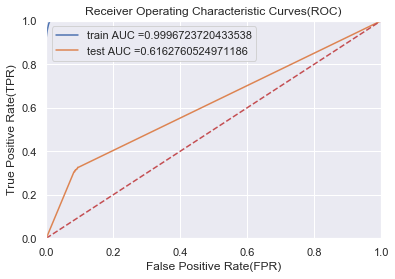

In [131]:

from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  DT_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=DT_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()


#### Plotting Confusion Matrices

In [132]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_pred_train_DT)
Test_Confusion_Matrix=confusion_matrix(y_test,y_pred_test_DT)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix :

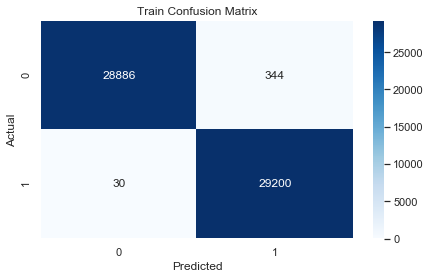

In [133]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix :

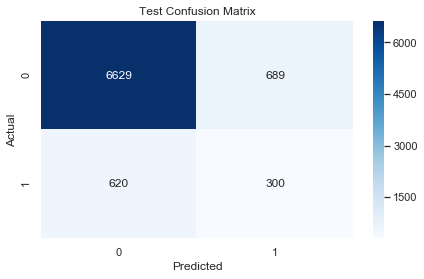

In [134]:

plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()


#### Finding Classification report

In [135]:

from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_pred_train_DT)
Classificationreport_test=classification_report(y_test,y_pred_test_DT)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       1.00      0.99      0.99     29230
           1       0.99      1.00      0.99     29230

    accuracy                           0.99     58460
   macro avg       0.99      0.99      0.99     58460
weighted avg       0.99      0.99      0.99     58460

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.91      0.91      0.91      7318
           1       0.30      0.33      0.31       920

    accuracy                           0.84      8238
   macro avg       0.61      0.62      0.61      8238
weighted avg       0.85      0.84      0.84      8238



#### Saving Decision Tree model for future purpose :

In [136]:
joblib.dump(DT_clf,'Decision_Tree.pkl')

['Decision_Tree.pkl']

## Building Random Forest model

#### Hyperparameter tuning using Randomizedsearchcv

In [137]:

# Assigning values to the parameters

depth=[5, 10, 20,30]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [138]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=2,n_jobs=-1)

In [139]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=5,scoring='accuracy',n_jobs=-1,n_iter=50)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Finding best parameters :

In [140]:
RF_RandomCV.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'max_depth': 30,
 'criterion': 'gini'}

In [141]:
RF_RandomCV.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [142]:
RF_RandomCV.best_score_

0.9564830653438248

#### Building Random Forest model using best parameters :

In [143]:
RF_clf=RandomForestClassifier(n_estimators=200,min_samples_split=5,max_depth=30,criterion='entropy',random_state=2,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 0.9940814231953472
The Test Accuracy is : 0.8737557659626123


#### Plotting ROC Curves :

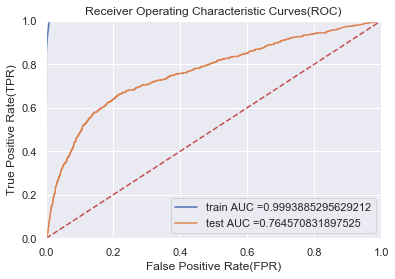

In [144]:

from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  RF_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=RF_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

#### Plotting Confusion Matrices

In [145]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix :

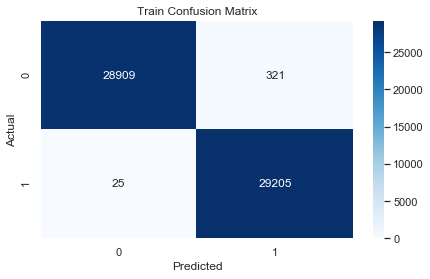

In [146]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Blues", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix :

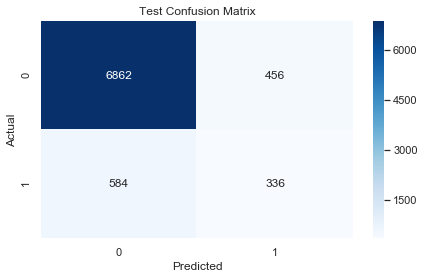

In [147]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Blues", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Finding Classification report

In [148]:

from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_RF)
Classificationreport_test=classification_report(y_test,y_test_pred_RF)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       1.00      0.99      0.99     29230
           1       0.99      1.00      0.99     29230

    accuracy                           0.99     58460
   macro avg       0.99      0.99      0.99     58460
weighted avg       0.99      0.99      0.99     58460

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7318
           1       0.42      0.37      0.39       920

    accuracy                           0.87      8238
   macro avg       0.67      0.65      0.66      8238
weighted avg       0.87      0.87      0.87      8238



#### Saving Random Forest model for future purpose :

In [149]:
joblib.dump(RF_clf,'Random_Forest.pkl',compress=3)

['Random_Forest.pkl']

## Handling Imbalanced data using SMOTE

In [150]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [151]:
# Separate input features and target
X = data.drop('y', axis=1)
y = data['y']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

smote = SMOTE(random_state=4)
X_train, y_train = smote.fit_sample(X_train, y_train)

## Building Logistic Regression

#### Hyperparameter tuning :

In [152]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(penalty='l1',random_state=3,n_jobs=-1,solver='liblinear')
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
Random_cv=RandomizedSearchCV(estimator=clf,param_distributions=param_grid,n_iter=100,scoring='accuracy',cv=5,random_state=5,n_jobs=-1)
Log_Randomecv=Random_cv.fit(X_train,y_train)

#### Finding best parameters :

In [153]:
Log_Randomecv.best_params_

{'C': 10}

In [154]:
Log_Randomecv.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l1', random_state=3,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [155]:
Log_Randomecv.best_score_

0.918296853625171

#### Standardizing the data :

In [156]:

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)



## Building Logistic Regression with best C :

In [157]:
log=LogisticRegression(C=10,penalty='l1',random_state=3,n_jobs=-1,solver='liblinear')
#Fitting the model
log.fit(X_train_std,y_train)
y_train_pred=log.predict(X_train_std)
y_test_pred=log.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.9352086183310534
The Test Accuracy is : 0.8973051711580481


#### Plotting ROC Curves :

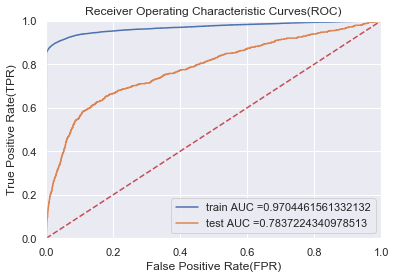

In [158]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  log.predict_proba(X_train_std)[:,1]
y_test_pred_proba=log.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrices

In [159]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix

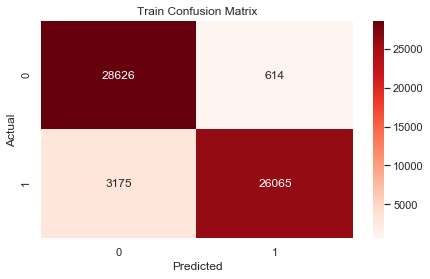

In [172]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Reds", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix

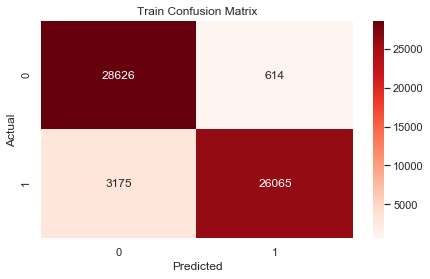

In [173]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Reds", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

In [174]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.90      0.98      0.94     29240
           1       0.98      0.89      0.93     29240

    accuracy                           0.94     58480
   macro avg       0.94      0.94      0.94     58480
weighted avg       0.94      0.94      0.94     58480

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.61      0.26      0.36       930

    accuracy                           0.90      8238
   macro avg       0.76      0.62      0.65      8238
weighted avg       0.88      0.90      0.88      8238



In [175]:
joblib.dump(log,'Smote_Logistic_Regression.pkl')

['Smote_Logistic_Regression.pkl']

## Building Random Forest Model

#### Hyperparameter tuning :

In [176]:
# Assigning values to the parameters

depth=[5, 10, 20,30]
min_samples_split=[5,10,20,30,40,50]
estimators=[50,100,150,200]
criterion=["gini", "entropy"]
params_grid=dict(n_estimators=estimators,max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)
params_grid

{'n_estimators': [50, 100, 150, 200],
 'max_depth': [5, 10, 20, 30],
 'min_samples_split': [5, 10, 20, 30, 40, 50],
 'criterion': ['gini', 'entropy']}

In [177]:
# Estimator

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(random_state=4,n_jobs=-1)

In [178]:
# Building RandomizedsSearchCV

RF_RandomCV=RandomizedSearchCV(RF,params_grid,cv=5,scoring='accuracy',n_jobs=-1,n_iter=20)
RF_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

#### Finding best parameters :

In [179]:
RF_RandomCV.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'max_depth': 30,
 'criterion': 'gini'}

In [180]:
RF_RandomCV.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=4, verbose=0,
                       warm_start=False)

In [182]:
RF_RandomCV.best_score_

0.9349692202462381

#### Building Random Forest with best parameters

In [183]:

RF_clf=RandomForestClassifier(n_estimators=150,min_samples_split=5,max_depth=30,criterion='gini',random_state=4,n_jobs=-1)
RF_clf.fit(X_train,y_train)
y_train_pred_RF=RF_clf.predict(X_train)
y_test_pred_RF=RF_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_RF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_RF))

The Training Accuracy is : 0.9777017783857729
The Test Accuracy is : 0.887229910172372


#### Plotting ROC Curves :

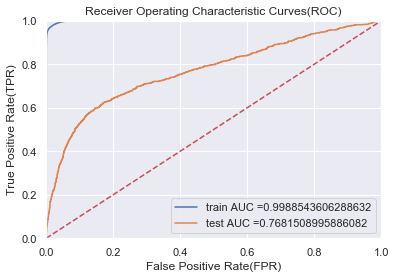

In [184]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  RF_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=RF_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

#### Plotting Confusion Matrix

In [185]:

Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_RF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_RF)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'


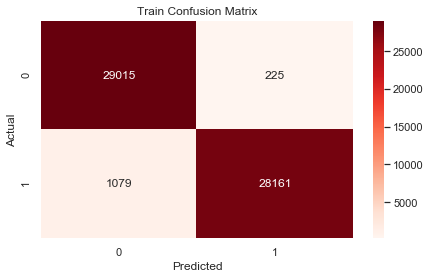

In [186]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Reds", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

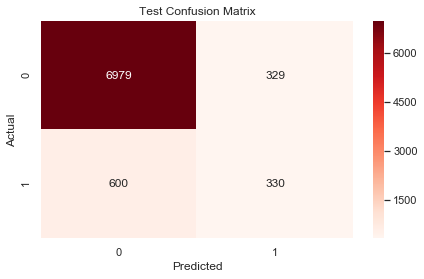

In [187]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Reds", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

### Finding Classification report

In [188]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred_RF)
Classificationreport_test=classification_report(y_test,y_test_pred_RF)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.96      0.99      0.98     29240
           1       0.99      0.96      0.98     29240

    accuracy                           0.98     58480
   macro avg       0.98      0.98      0.98     58480
weighted avg       0.98      0.98      0.98     58480

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.92      0.95      0.94      7308
           1       0.50      0.35      0.42       930

    accuracy                           0.89      8238
   macro avg       0.71      0.65      0.68      8238
weighted avg       0.87      0.89      0.88      8238



In [189]:
joblib.dump(log,'Smote_Random Forest.pkl')

['Smote_Random Forest.pkl']

## Building Decision Tree model

In [190]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[5, 10, 50, 100, 500]
min_samples_split=[5,10,20,30,40,50]
criterion=["gini", "entropy"]
params_grid=dict(max_depth=depth,min_samples_split=min_samples_split,criterion=criterion)

In [191]:
# Estimator

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(random_state=4)

In [192]:
# Building RandomizedsSearchCV

DT_RandomCV=RandomizedSearchCV(DT,params_grid,cv=5,n_iter=200,scoring='accuracy',n_jobs=-1)
DT_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=4,
             

#### #Finding best parameters

In [193]:
DT_RandomCV.best_params_

{'min_samples_split': 10, 'max_depth': 50, 'criterion': 'entropy'}

In [194]:
DT_RandomCV.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=4, splitter='best')

In [195]:
DT_RandomCV.best_score_

0.9087380300957593

### Building Decision Tree model using best parameters

In [196]:
DT_clf=DecisionTreeClassifier(min_samples_split=10,max_depth=50,criterion='entropy',random_state=4,class_weight='balanced')
DT_clf.fit(X_train,y_train)
y_pred_train_DT=DT_clf.predict(X_train)
y_pred_test_DT=DT_clf.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_pred_train_DT))
print("The Test Accuracy is :",accuracy_score(y_test,y_pred_test_DT))

The Training Accuracy is : 0.9638850889192886
The Test Accuracy is : 0.8585821801408109


### Plotiing ROC Curves

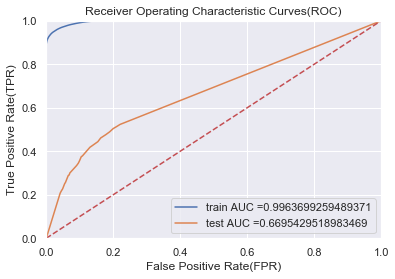

In [197]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  DT_clf.predict_proba(X_train)[:,1]
y_test_pred_proba=DT_clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

#### Plotting Confusion Matrices

In [198]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_pred_train_DT)
Test_Confusion_Matrix=confusion_matrix(y_test,y_pred_test_DT)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix :

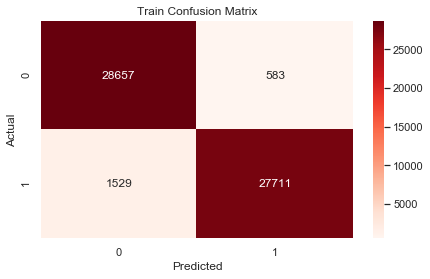

In [199]:

plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Reds", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Train Confusion Matrix :

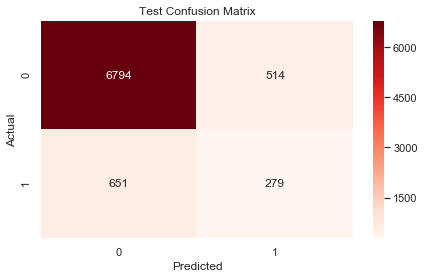

In [200]:

plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Reds", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()


### Finding Classification report

In [201]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_pred_train_DT)
Classificationreport_test=classification_report(y_test,y_pred_test_DT)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.95      0.98      0.96     29240
           1       0.98      0.95      0.96     29240

    accuracy                           0.96     58480
   macro avg       0.96      0.96      0.96     58480
weighted avg       0.96      0.96      0.96     58480

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.91      0.93      0.92      7308
           1       0.35      0.30      0.32       930

    accuracy                           0.86      8238
   macro avg       0.63      0.61      0.62      8238
weighted avg       0.85      0.86      0.85      8238



#### Saving Decision Tree model for future purpose 

In [202]:
joblib.dump(DT_clf,'Smote_Decision_Tree.pkl')

['Smote_Decision_Tree.pkl']

## Building XGBOOST Classifier

#### Hyperparameter tuning

In [203]:
from sklearn.model_selection import RandomizedSearchCV
# Assigning values to the parameters
depth=[1, 5, 10, 50, 100, 200]
estimators=[50,70,90,110,130,150,170]
params_grid=dict(max_depth=depth,n_estimators=estimators)

In [204]:
# Estimator

from xgboost import XGBClassifier
xgb=XGBClassifier(random_state=5,n_jobs=-1)

In [205]:
# Building RandomizedsSearchCV

xgb_RandomCV=RandomizedSearchCV(xgb,params_grid,cv=3,scoring='accuracy',n_jobs=-1)
xgb_RandomCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=5, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='d

#### Finding best parameters :

In [206]:
xgb_RandomCV.best_params_

{'n_estimators': 50, 'max_depth': 50}

In [207]:
xgb_RandomCV.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=50,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [208]:
xgb_RandomCV.best_score_

0.9287633201672661

#### Building Xgboost with best parameters :

In [209]:
XGB=XGBClassifier(n_estimators=50,max_depth=50,random_state=5,n_jobs=-1)
XGB.fit(X_train,y_train)
y_train_pred_XGBF=XGB.predict(X_train)
y_test_pred_XGB=XGB.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_XGBF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_XGB))

The Training Accuracy is : 0.982421340629275
The Test Accuracy is : 0.8829813061422676


We can see that the model is overfitted.We can make it bit complex to avoid overfitting.

In [213]:
XGB=XGBClassifier(n_estimators=50,max_depth=50,random_state=5,n_jobs=-1,booster='gbtree',gamma=0.8,subsample=0.9)
XGB.fit(X_train,y_train)
y_train_pred_XGBF=XGB.predict(X_train)
y_test_pred_XGB=XGB.predict(X_test)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred_XGBF))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred_XGB))

The Training Accuracy is : 0.9768980848153215
The Test Accuracy is : 0.8858946346200534


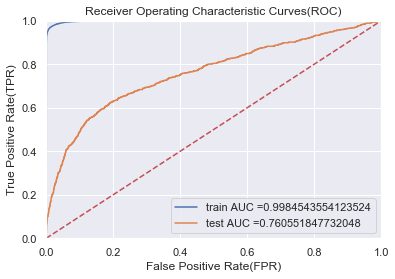

In [214]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  XGB.predict_proba(X_train)[:,1]
y_test_pred_proba=XGB.predict_proba(X_test)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

#### Confusion Matrix

In [215]:

Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred_XGBF)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred_XGB)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

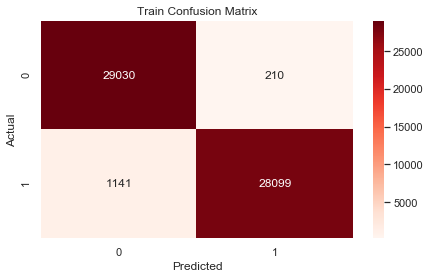

In [216]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Reds", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

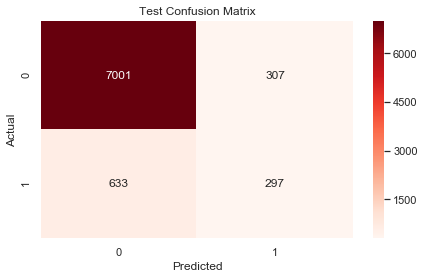

In [217]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Reds", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Classification Report :

In [218]:
Classificationreport_train=classification_report(y_train,y_train_pred_XGBF)
Classificationreport_test=classification_report(y_test,y_test_pred_XGB)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.96      0.99      0.98     29240
           1       0.99      0.96      0.98     29240

    accuracy                           0.98     58480
   macro avg       0.98      0.98      0.98     58480
weighted avg       0.98      0.98      0.98     58480

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7308
           1       0.49      0.32      0.39       930

    accuracy                           0.89      8238
   macro avg       0.70      0.64      0.66      8238
weighted avg       0.87      0.89      0.88      8238



### Saving XGBoost model for future purpose 

In [219]:
joblib.dump(DT_clf,'Smote_XGBoost Classifier.pkl')

['Smote_XGBoost Classifier.pkl']

## KNeighborsClassifier

In [220]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# creating odd list of K for KNN
neighbors = list(range(1,31, 2))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

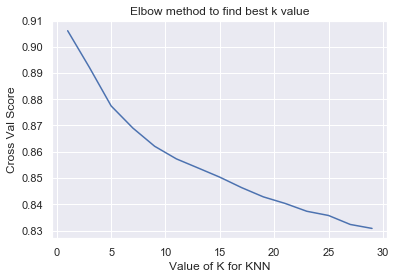

In [221]:
# Plotting the elbow method graph

plt.plot(neighbors, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Val Score')
plt.title("Elbow method to find best k value")
plt.show()

From the plot,we can see that the best k value is 5

#### Standardizing the data

In [225]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

#### Building KNN model with best k value:

In [226]:
KNN = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
KNN.fit(X_train_std, y_train)#fitting the model
y_train_pred=KNN.predict(X_train_std)
y_test_pred=KNN.predict(X_test_std)
print("The Training Accuracy is :",accuracy_score(y_train,y_train_pred))
print("The Test Accuracy is :",accuracy_score(y_test,y_test_pred))

The Training Accuracy is : 0.9465971272229822
The Test Accuracy is : 0.8733915999028891


### Plotting ROC Curvres

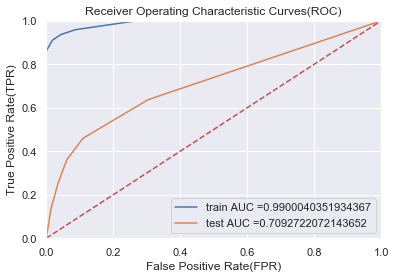

In [227]:
from sklearn.metrics import roc_curve,auc
y_train_pred_proba =  KNN.predict_proba(X_train_std)[:,1]
y_test_pred_proba=KNN.predict_proba(X_test_std)[:,1]

train_fpr, train_tpr, thresholds_tr = roc_curve(y_train, y_train_pred_proba)
test_fpr, test_tpr, thresholds_te = roc_curve(y_test,y_test_pred_proba)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.legend()
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("Receiver Operating Characteristic Curves(ROC)")
plt.show()

### Plotting Confusion Matrix

In [228]:
Train_Confusion_Matrix=confusion_matrix(y_train, y_train_pred)
Test_Confusion_Matrix=confusion_matrix(y_test,y_test_pred)
df_Train=pd.DataFrame(Train_Confusion_Matrix,columns=np.unique(y_train), index = np.unique(y_train))
df_Test=pd.DataFrame(Test_Confusion_Matrix,columns=np.unique(y_test), index = np.unique(y_test))
df_Train.index.name = 'Actual'
df_Train.columns.name = 'Predicted'
df_Test.index.name = 'Actual'
df_Test.columns.name = 'Predicted'

#### Train Confusion Matrix

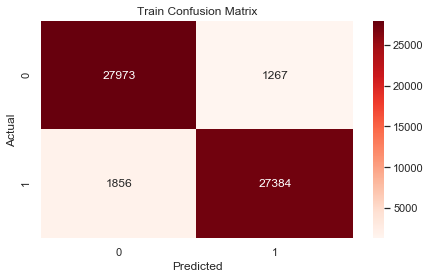

In [229]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Train, cmap="Reds", annot=True,fmt='2d')
plt.title("Train Confusion Matrix")
plt.show()

#### Test Confusion Matrix

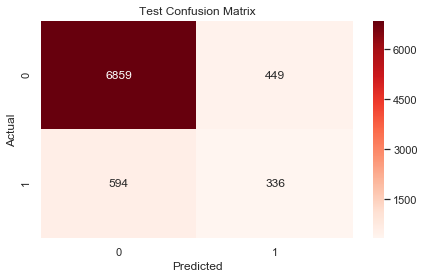

In [230]:
plt.figure(figsize = (7,4))
sns.set(font_scale=1)#for label size
sns.heatmap(df_Test, cmap="Reds", annot=True,fmt='2d')
plt.title("Test Confusion Matrix")
plt.show()

#### Calculating f1 score :

In [231]:
f1_score_train=f1_score(y_train,y_train_pred)
f1_score_test=f1_score(y_test,y_test_pred)
print("Training F1_score is :",f1_score_train)
print("Testing F1_score is :",f1_score_test)

Training F1_score is : 0.9460537907446753
Testing F1_score is : 0.39183673469387753


### Classification Report 

In [232]:
from sklearn.metrics import classification_report
Classificationreport_train=classification_report(y_train,y_train_pred)
Classificationreport_test=classification_report(y_test,y_test_pred)
print("Training Classificationreport is :",Classificationreport_train)
print("Testing Classificationreportt is :",Classificationreport_test)

Training Classificationreport is :               precision    recall  f1-score   support

           0       0.94      0.96      0.95     29240
           1       0.96      0.94      0.95     29240

    accuracy                           0.95     58480
   macro avg       0.95      0.95      0.95     58480
weighted avg       0.95      0.95      0.95     58480

Testing Classificationreportt is :               precision    recall  f1-score   support

           0       0.92      0.94      0.93      7308
           1       0.43      0.36      0.39       930

    accuracy                           0.87      8238
   macro avg       0.67      0.65      0.66      8238
weighted avg       0.86      0.87      0.87      8238



### Saving KNN model for future purpose :

In [233]:
from sklearn.externals import joblib
joblib.dump(KNN,'smote_KNN.pkl',compress=3)

['smote_KNN.pkl']

## Comparing the performance of models using Pretty Table

In [257]:
from prettytable import PrettyTable
x=PrettyTable()

In [258]:
x.field_names=['Model_Name','Train_AUC','Test_AUC','Traing_Acc','Test_Acc']

In [259]:
x.add_row(['KNN',91.8,72.48,81.90,70.05])
x.add_row(['Logistic_Regression',79.20,79.20,74.0,83.0])
x.add_row(['Decision Tree',99.97,61.63,99.40,84.11])
x.add_row(['Random_Forest',99.94,76.46,99.41,87.37])
x.add_row(['Xgboost',99.85,76.0,98.24,88.3])

In [260]:
print(x)

+---------------------+-----------+----------+------------+----------+
|      Model_Name     | Train_AUC | Test_AUC | Traing_Acc | Test_Acc |
+---------------------+-----------+----------+------------+----------+
|         KNN         |    91.8   |  72.48   |    81.9    |  70.05   |
| Logistic_Regression |    79.2   |   79.2   |    74.0    |   83.0   |
|    Decision Tree    |   99.97   |  61.63   |    99.4    |  84.11   |
|    Random_Forest    |   99.94   |  76.46   |   99.41    |  87.37   |
|       Xgboost       |   99.85   |   76.0   |   98.24    |   88.3   |
+---------------------+-----------+----------+------------+----------+


###### Conclusions :
From the Pretty table,we can see that the Random Forest is the best model.
Therefore,we can deploy Random Forest model in production.

#### Results: SMOTE (Synthetic Minority Oversampling Technique) – Oversampling Method

In [276]:
x_smote=PrettyTable()

In [277]:
x_smote.field_names=['Model_Name','Train_AUC','Test_AUC','Traing_Acc','Test_Acc','Precision','f1score','recall']

In [278]:
x_smote.add_row(['KNN',99.0,71.0,94.66,87.34])
x_smote.add_row(['Logistic_Regression',97.04,78.37,93.52,89.73])
x_smote.add_row(['Decision Tree',99.64,67.0,96.4,86.0])
x_smote.add_row(['Random_Forest',99.88,76.82,97.77,88.72])
x_smote.add_row(['Xgboost',99.85,76.0,98.24,88.30])


In [279]:
print(x_smote)

+---------------------+-----------+----------+------------+----------+
|      Model_Name     | Train_AUC | Test_AUC | Traing_Acc | Test_Acc |
+---------------------+-----------+----------+------------+----------+
|         KNN         |    99.0   |   71.0   |   94.66    |  87.34   |
| Logistic_Regression |   97.04   |  78.37   |   93.52    |  89.73   |
|    Decision Tree    |   99.64   |   67.0   |    96.4    |   86.0   |
|    Random_Forest    |   99.88   |  76.82   |   97.77    |  88.72   |
|       Xgboost       |   99.85   |   76.0   |   98.24    |   88.3   |
+---------------------+-----------+----------+------------+----------+


###### Conclusions :
From the Pretty table,we can see that the Random Forest is the best model.
Therefore,we can deploy Random Forest model in production.

## Using RFE for feature selection
In this task let's use Recursive Feature Elimination for selecting the best features. RFE is a wrapper method that uses the model to identify the best features.

The function feature selection takes four parameters predictors, target, model and the number_of_features. The parameter number_of_features is used for explicitly stating the number of features you want to specify inside the RFE object. For the below task, we have inputted 10 feature. 

In [256]:
def feature_selection(predictors,target,number_of_features,model):

    models = model()
    rfe = RFE(models,number_of_features)
    rfe = rfe.fit(X,y)
    feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
    plt.show()
    print('Features  to be selected for {} are:'.format(str(i[0])))
    print(feature_ranking[feature_ranking.values==1].index.tolist())
    print('===='*30)

# Choosing the models. If you want to specify additional models, kindly specify them as a key-value pair as shown below.
models = {'Logistic Regression':LogisticRegression,'Random Forest':RandomForestClassifier,'XGBoost':XGBClassifier,
          'Decision Tree': DecisionTreeClassifier}

# Selecting 10 number of features
for i in models.items():
    feature_selection(X,y,10,i[1])

Features  to be selected for Logistic Regression are:
['previous', 'emp_var_rate', 'job_student', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'pout_failure', 'pout_success']
Features  to be selected for Random Forest are:
['age', 'education', 'campaign', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'marry_married', 'house_no', 'wkday_thu', 'pout_success']
Features  to be selected for XGBoost are:
['emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'def_no', 'ph_cellular', 'month_mar', 'month_may', 'month_oct', 'pout_failure', 'pout_success']
Features  to be selected for Decision Tree are:
['age', 'education', 'campaign', 'emp_var_rate', 'cons_conf_idx', 'job_admin.', 'marry_married', 'house_no', 'loan_no', 'pout_success']


### Feature Selection using Random Forest

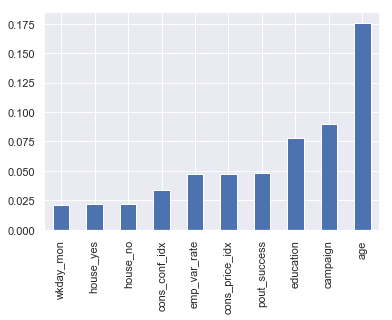

In [255]:
    def rfc_feature_selection(X,y):
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify= y)
        rfc = RandomForestClassifier(random_state=42)
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_test)
        rfc_importances = pd.Series(rfc.feature_importances_,index=X.columns ).sort_values().tail(10)
        rfc_importances.plot(kind='bar')
        plt.show()
       
    rfc_feature_selection(X,y)


In [246]:
from sklearn.ensemble import VotingClassifier


log_clf = LogisticRegression(solver='lbfgs')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(3)
knn_clf.fit(X_train, y_train)
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


voting_clf = VotingClassifier(estimators=[('rf',rf_clf),('lr', log_clf), ('knn', knn_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

y_pred = voting_clf.predict(X_test)
print(skm.confusion_matrix(y_test, y_pred,labels=[1,0]))
print(skm.f1_score(y_test, y_pred,labels=[1,0]))

[[ 452  478]
 [ 559 6749]]
0.4657393096342092


In [247]:
print(skm.classification_report(y_test, y_pred,labels=[1,0]))

              precision    recall  f1-score   support

           1       0.45      0.49      0.47       930
           0       0.93      0.92      0.93      7308

    accuracy                           0.87      8238
   macro avg       0.69      0.70      0.70      8238
weighted avg       0.88      0.87      0.88      8238



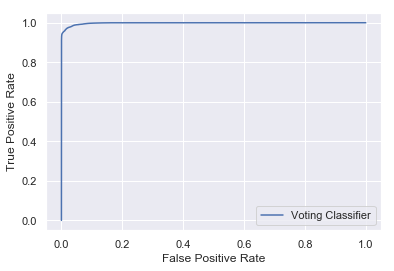

In [248]:
y_train_prob = voting_clf.predict_proba(X_train)
fpr, tpr, threshold = roc_curve(y_train, y_train_prob[:,1])
plt.plot(fpr, tpr, label = 'Voting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()